In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
files.upload()

# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 67 Oct 13 09:36 kaggle.json


In [3]:
!kaggle datasets download -d sdolezel/black-friday

 67% 5.00M/7.51M [00:00<00:00, 25.9MB/s]
100% 7.51M/7.51M [00:00<00:00, 29.8MB/s]


In [4]:
from zipfile import ZipFile

filename='/content/black-friday.zip'
with ZipFile(filename,'r') as zip:
  zip.extractall()
  print('done!')

done!


In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [0]:
import missingno as mn
# !pip install missingno 

In [0]:
# mn.bar(train)

In [0]:
# mn.matrix(train)

In [0]:
data = pd.concat([train, test], sort=False)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
User_ID                       783667 non-null int64
Product_ID                    783667 non-null object
Gender                        783667 non-null object
Age                           783667 non-null object
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Purchase                      550068 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


###  EDA

In [12]:
data.shape

(783667, 12)

In [13]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [0]:
# mn.matrix(data)

In [0]:
data.drop(["User_ID", "Product_ID"], axis =1, inplace = True)

In [16]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
Gender                        783667 non-null object
Age                           783667 non-null object
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Purchase                      550068 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 65.8+ MB


In [18]:
data.Stay_In_Current_City_Years.value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [0]:
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].str.replace("+","")

In [20]:
data.Stay_In_Current_City_Years.value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [0]:
data["Stay_In_Current_City_Years"] = pd.to_numeric(data["Stay_In_Current_City_Years"])

In [22]:
data.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [23]:
data["City_Category"].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [24]:
round(data["Product_Category_2"].isnull().sum()/data.shape[0] * 100, 2)

31.39

In [25]:
round(data["Product_Category_3"].isnull().sum()/data.shape[0] * 100, 2)

69.65

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,783667.0,8.079300,6.522206,0.0,2.0,7.0,14.0,20.0
Stay_In_Current_City_Years,783667.0,1.858247,1.288790,0.0,1.0,2.0,3.0,4.0
Marital_Status,783667.0,0.409777,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,12.668605,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use("seaborn")
sns.set_context("talk")

from scipy.stats import skew

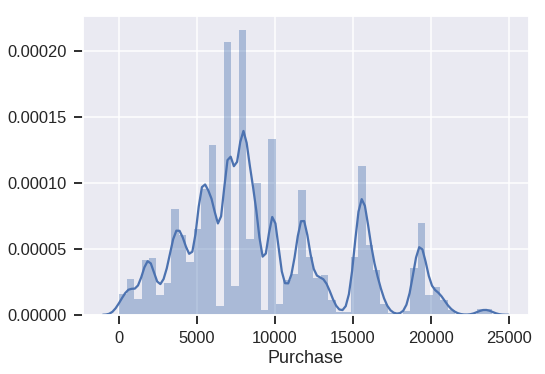

In [28]:
sns.distplot(train["Purchase"])

In [29]:
train["Purchase"].skew() # should be < 0.75

0.6001400037087128

In [30]:
data.skew().sort_values(ascending=False)

Product_Category_1            0.986594
Purchase                      0.600140
Occupation                    0.399767
Marital_Status                0.366914
Stay_In_Current_City_Years    0.318568
Product_Category_2           -0.163941
Product_Category_3           -0.766017
dtype: float64

In [0]:
# data["Occupation"]

In [32]:
data["Product_Category_2"]

0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
5          2.0
6          8.0
7         15.0
8         16.0
9          NaN
10        11.0
11         NaN
12         NaN
13         2.0
14         8.0
15         5.0
16         3.0
17        14.0
18        14.0
19         5.0
20        14.0
21         NaN
22         NaN
23         NaN
24         8.0
25         8.0
26         NaN
27        14.0
28         8.0
29         4.0
          ... 
233569    15.0
233570     5.0
233571     NaN
233572     NaN
233573    15.0
233574    15.0
233575     8.0
233576     NaN
233577     8.0
233578     2.0
233579     2.0
233580    14.0
233581    17.0
233582    11.0
233583     5.0
233584    11.0
233585     NaN
233586     2.0
233587    16.0
233588     8.0
233589    15.0
233590     NaN
233591     2.0
233592     8.0
233593     NaN
233594     NaN
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [0]:
data["Product_Category_2"] = data["Product_Category_2"].fillna(np.mean(data["Product_Category_2"]))

In [0]:
data["Product_Category_3"] = data["Product_Category_3"].fillna(np.mean(data["Product_Category_3"]))

In [0]:
# np.mean(data["Product_Category_2"])
# data["Product_Category_2"]

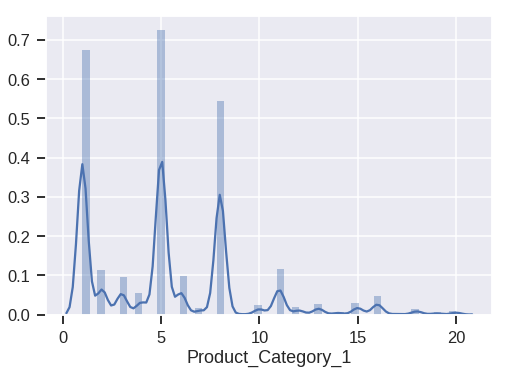

In [36]:
sns.distplot(data["Product_Category_1"])

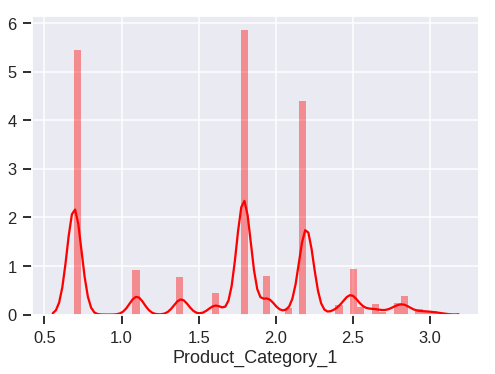

In [37]:
sns.distplot(np.log1p(data["Product_Category_1"]), color="red")

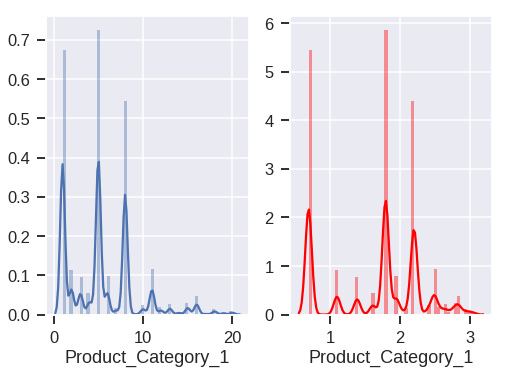

In [38]:
plt.subplot2grid((1,2), (0,0))

sns.distplot(data["Product_Category_1"])

plt.subplot2grid((1,2),(0,1))
sns.distplot(np.log1p(data["Product_Category_1"]), color="red")

In [39]:
data["Occupation"].value_counts()

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

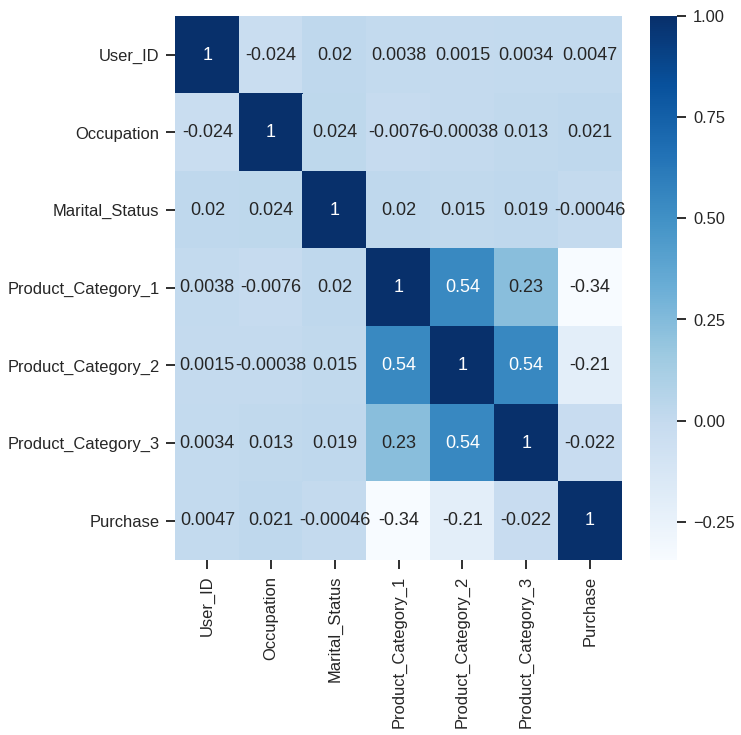

In [40]:
plt.figure(figsize = (10,10))
# mask = 
sns.heatmap(train.corr(), annot=True, cmap="Blues")

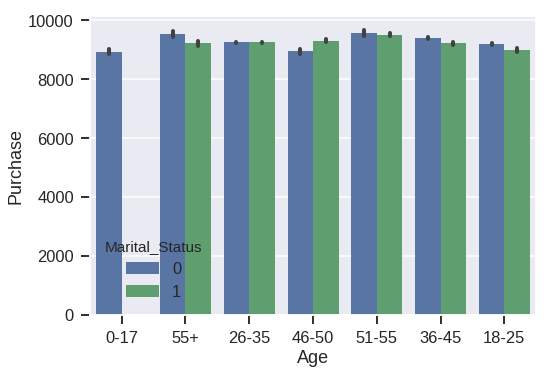

In [41]:
sns.barplot(train["Age"],train["Purchase"], data=train, hue=train["Marital_Status"])

#### Detection of outliers by interquantile range

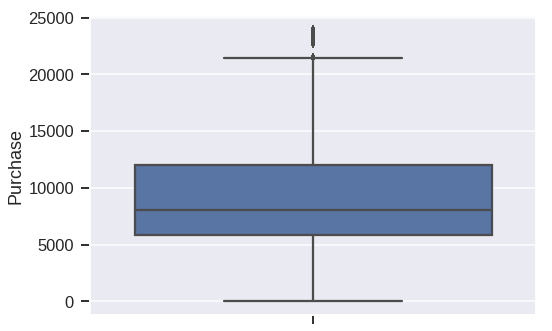

In [42]:
sns.boxplot(train["Purchase"], orient='v')

In [43]:

outlier = []

# def outlier_detector(df):
q1,q3 = np.percentile(train["Purchase"], [25,70])

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(lower_bound)
print(upper_bound)

-2734.5
20085.5


In [44]:
len(train[train["Purchase"]>20085.5])

12015

In [0]:
# data[data["Purchase"]>20085]

In [0]:
# data[data["Purchase"] > 20085.5]

In [0]:
# data.drop(data[data["Purchase"] > 20085.5].index, inplace = True)

In [48]:
data.shape

(783667, 10)

In [49]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.844506,12.668605,8370.0
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200.0
2,F,0-17,10,A,2,0,12,9.844506,12.668605,1422.0
3,F,0-17,10,A,2,0,12,14.000000,12.668605,1057.0
4,M,55+,16,C,4,0,8,9.844506,12.668605,7969.0


In [50]:
data.Age.value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [0]:
data["Gender"] = le.fit_transform(data["Gender"])

In [53]:
data.Gender.head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

In [0]:
dummy_city= pd.get_dummies(data['City_Category'])

In [0]:
data.drop(["City_Category"], axis =1, inplace = True)

In [56]:
data

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,2,0,3,9.844506,12.668605,8370.0
1,0,0-17,10,2,0,1,6.000000,14.000000,15200.0
2,0,0-17,10,2,0,12,9.844506,12.668605,1422.0
3,0,0-17,10,2,0,12,14.000000,12.668605,1057.0
4,1,55+,16,4,0,8,9.844506,12.668605,7969.0
5,1,26-35,15,3,0,1,2.000000,12.668605,15227.0
6,1,46-50,7,2,1,1,8.000000,17.000000,19215.0
7,1,46-50,7,2,1,1,15.000000,12.668605,15854.0
8,1,46-50,7,2,1,1,16.000000,12.668605,15686.0
9,1,26-35,20,1,1,8,9.844506,12.668605,7871.0


In [57]:
dummy_city

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
5,1,0,0
6,0,1,0
7,0,1,0
8,0,1,0
9,1,0,0


In [0]:
dummy_city = dummy_city.drop("A", axis = 1)

In [0]:
data = pd.concat([dummy_city, data], axis =1)

In [60]:
data.head()

,B,C,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,0-17,10,2,0,3,9.844506,12.668605,8370.0
1,0,0,0,0-17,10,2,0,1,6.000000,14.000000,15200.0
2,0,0,0,0-17,10,2,0,12,9.844506,12.668605,1422.0
3,0,0,0,0-17,10,2,0,12,14.000000,12.668605,1057.0
4,0,1,1,55+,16,4,0,8,9.844506,12.668605,7969.0


In [0]:
age = pd.get_dummies(data["Age"])

In [0]:
age = age.drop(["55+"], axis = 1)

In [0]:
data.drop("Age", axis = 1, inplace = True)

In [0]:
data = pd.concat([age, data], axis = 1)

In [0]:
data["Product_Category_1"] = np.log1p(data["Product_Category_1"]) 

In [66]:
data.head()

,0-17,18-25,26-35,36-45,46-50,51-55,B,C,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,0,0,0,0,0,0,0,10,2,0,1.386294,9.844506,12.668605,8370.0
1,1,0,0,0,0,0,0,0,0,10,2,0,0.693147,6.000000,14.000000,15200.0
2,1,0,0,0,0,0,0,0,0,10,2,0,2.564949,9.844506,12.668605,1422.0
3,1,0,0,0,0,0,0,0,0,10,2,0,2.564949,14.000000,12.668605,1057.0
4,0,0,0,0,0,0,0,1,1,16,4,0,2.197225,9.844506,12.668605,7969.0


In [67]:
data[:train.shape[0]].isnull().sum()

0-17                          0
18-25                         0
26-35                         0
36-45                         0
46-50                         0
51-55                         0
B                             0
C                             0
Gender                        0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [0]:
train2 = data[: train.shape[0]]

In [69]:
train2.shape

(550068, 16)

In [0]:
test2 = data[train.shape[0] :]

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
train2.drop(train2[train2["Purchase"] > 20085.5].index, inplace = True)

In [0]:
test2.drop(["Purchase"], inplace = True, axis = 1)

In [0]:
# y = train2["Purchase"]

In [0]:
# X.shape

In [0]:
# y.shape

In [77]:
train2.shape

(538053, 16)

In [78]:
test2.shape

(233599, 15)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = train2.drop(["Purchase"], axis =1)

In [0]:
y = train2["Purchase"]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=33, random_state=942) # 42, 20

### Model

##### Decision Tree regressor 

In [83]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
pred = model.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

In [86]:
rmse

1896.6927270865872

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [88]:
np.sqrt(-scores).mean() # what the hell

3193.3349143088676

#####  Random Forest regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
predictions = model.predict(X_test)

In [0]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

In [92]:
rmse

1932.6968866767318

##### Boosting 

In [0]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()

In [94]:
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [0]:
predictions = model.predict(X_test)

In [0]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

In [97]:
rmse

3600.556852983617

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [99]:
np.sqrt(-scores).mean() 

3425.5661413392977

##### Extra pre 

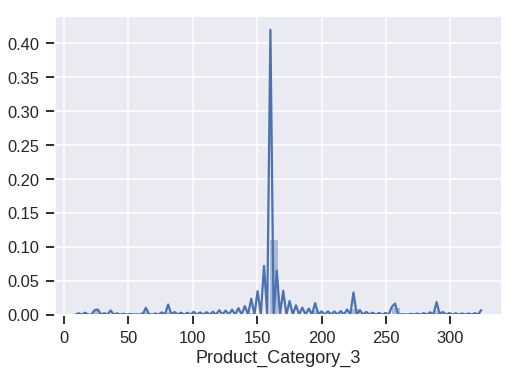

In [100]:
sns.distplot(np.square(data["Product_Category_3"]))

In [0]:
# np.square(data["Product_Category_3"]).skew() # less than 0.75

In [0]:
# data["Product_Category_3"] = np.square(data["Product_Category_3"])

######  XGBoost

In [0]:
import xgboost as xgb

In [0]:
regressor = xgb.XGBRegressor()

In [105]:
regressor.fit(X_train,y_train)

[09:38:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [108]:
rmse

2155.958432973736

In [0]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(regressor, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [0]:
# np.sqrt(-scores).mean() 

####  Randomized Search cv 
-Hyperparameter tuning

In [110]:
from sklearn.model_selection import TimeSeriesSplit
cv=10
paramGrid = {
             "subsample" : [0.5, 0.8],
             'gammma' : [0, 0.5],
             'max_depth' : [6, 7, 8]
             }
from sklearn.model_selection import RandomizedSearchCV

fit_params={"eval_metric" : "rmse", 
            "eval_set" : [[X_test, y_test]]}

ramdom_search = RandomizedSearchCV(regressor, paramGrid, verbose=1,          
         cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X_train, y_train]))

ramdom_search.fit(X_train, y_train, **fit_params)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[09:39:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9280.17
[1]	validation_0-rmse:8494.2
[2]	validation_0-rmse:7787.14
[3]	validation_0-rmse:7172.99
[4]	validation_0-rmse:6625.65
[5]	validation_0-rmse:6143.49
[6]	validation_0-rmse:5705.23
[7]	validation_0-rmse:5329.92
[8]	validation_0-rmse:4998.98
[9]	validation_0-rmse:4707.18
[10]	validation_0-rmse:4374.19
[11]	validation_0-rmse:4075.46
[12]	validation_0-rmse:3816.03
[13]	validation_0-rmse:3589.95
[14]	validation_0-rmse:3438.83
[15]	validation_0-rmse:3265.75
[16]	validation_0-rmse:3126.46
[17]	validation_0-rmse:2984
[18]	validation_0-rmse:2862.08
[19]	validation_0-rmse:2771.68
[20]	validation_0-rmse:2686.07
[21]	validation_0-rmse:2609.52
[22]	validation_0-rmse:2556.16
[23]	validation_0-rmse:2512.3
[24]	validation_0-rmse:2453.59
[25]	validation_0-rmse:2419.5
[26]	validation_0-rmse:2377.71
[27]	validation_0-rmse:2351.05
[28]	validation_0-rms

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 119.7min finished


[11:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9229.78
[1]	validation_0-rmse:8396.58
[2]	validation_0-rmse:7656.99
[3]	validation_0-rmse:6992.26
[4]	validation_0-rmse:6400.22
[5]	validation_0-rmse:5878.34
[6]	validation_0-rmse:5401.68
[7]	validation_0-rmse:4979.46
[8]	validation_0-rmse:4606.03
[9]	validation_0-rmse:4282.07
[10]	validation_0-rmse:3989.92
[11]	validation_0-rmse:3730.23
[12]	validation_0-rmse:3510.07
[13]	validation_0-rmse:3312.2
[14]	validation_0-rmse:3145.52
[15]	validation_0-rmse:2998.74
[16]	validation_0-rmse:2866.84
[17]	validation_0-rmse:2758.94
[18]	validation_0-rmse:2658.32
[19]	validation_0-rmse:2568.18
[20]	validation_0-rmse:2493.67
[21]	validation_0-rmse:2430.8
[22]	validation_0-rmse:2377.45
[23]	validation_0-rmse:2333.8
[24]	validation_0-rmse:2294.1
[25]	validation_0-rmse:2262
[26]	validation_0-rmse:2241.9
[27]	validation_0-rmse:2216.81
[28]	validation_0-rmse:

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                 

In [0]:
y_pred=ramdom_search.predict(X_test)

In [0]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [120]:
rmse

2086.4703704375775

In [123]:
ramdom_search.best_estimator_  

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gammma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [124]:
ramdom_search.best_index_

8

In [125]:
ramdom_search.best_params_

{'gammma': 0, 'max_depth': 8, 'subsample': 0.8}